# Seaborn Tutorial

 😀
In this notebook, I'm going to talk about Seaborn.
</br>
Happy learning 🐱‍🏍 

## Seaborn vs Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Load the Datasaurus Dozen dataset from seaborn's example datasets
datasaurus = pd.read_csv("Datasets/DatasaurusDozen.tsv", sep="\t")
#datasaurus = sns.load_dataset("DatasaurusDozen.tsv", sep="\t")

# Show summary statistics for each dataset
print(datasaurus.groupby("dataset").describe())

In [ ]:
# Plot each dataset in the Datasaurus Dozen
g = sns.FacetGrid(datasaurus, col="dataset", col_wrap=4, height=3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="x", y="y")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

## Exploring Seaborn Plots

In [2]:
iris = sns.load_dataset("iris")

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
pd.set_option('display.max_rows', None)# changed the option to display all rows
pd.set_option('display.max_columns', None) # changed the option to display all columns
print(iris.groupby("species").describe())# grouped the data by species and printed the descriptive statistics for each group

           sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width                                                \
                 count   mean       std  min    25%  50%    75%  max   
species                                                                
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max

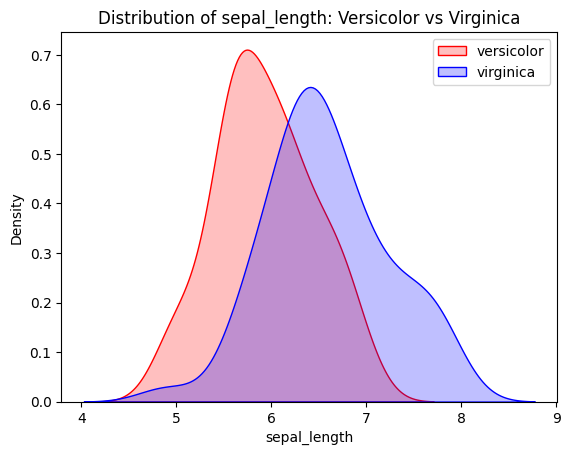

In [11]:


versicolor = iris.loc[iris.species == "versicolor"]
virginica = iris.loc[iris.species == "virginica"]
setosa = iris.loc[iris.species == "setosa"]

sns.kdeplot(versicolor.sepal_length, label="versicolor", shade=True, color="r")
sns.kdeplot(virginica.sepal_length, label="virginica", shade=True, color="b")
plt.title("Distribution of sepal_length: Versicolor vs Virginica")
plt.legend()
plt.show()

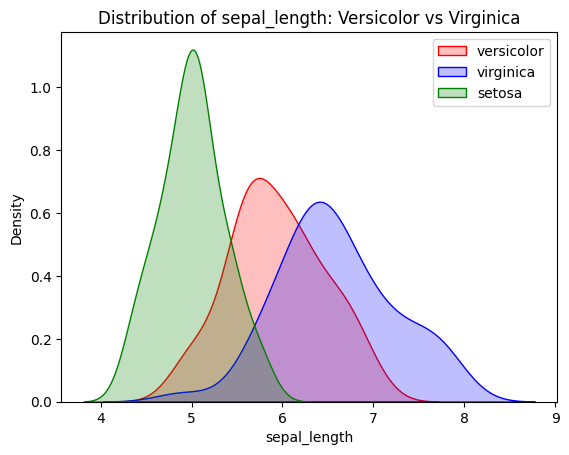

In [12]:
sns.kdeplot(versicolor.sepal_length, label="versicolor", shade=True, color="r")
sns.kdeplot(virginica.sepal_length, label="virginica", shade=True, color="b")
sns.kdeplot(setosa.sepal_length, label="setosa", shade=True, color="g")
plt.title("Distribution of sepal_length: Versicolor vs Virginica")
plt.legend()
plt.show()

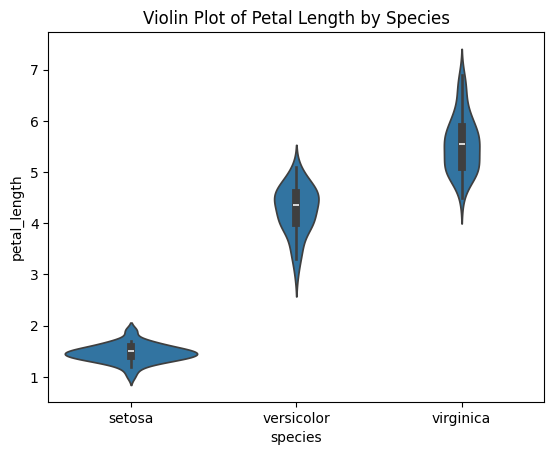

In [13]:
sns.violinplot(x="species", y="petal_length", data=iris)
plt.title("Violin Plot of Petal Length by Species")
plt.show()


In [23]:
setosa=iris.loc[iris.species== "setosa"]
virginica = iris.loc[iris.species == "virginica"]

## Histogram and Density Plots 

<Axes: ylabel='Frequency'>

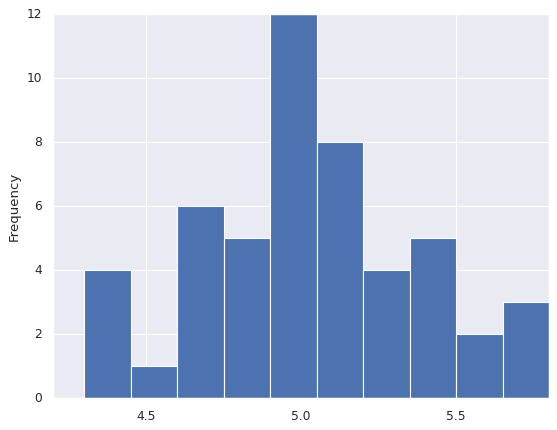

In [24]:
setosa.sepal_length.plot.hist()

<Axes: xlabel='sepal_length', ylabel='Count'>

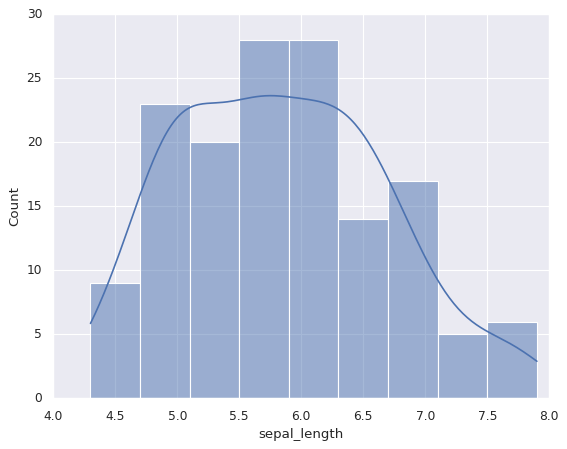

In [26]:
sns.histplot(iris.sepal_length, kde=True)

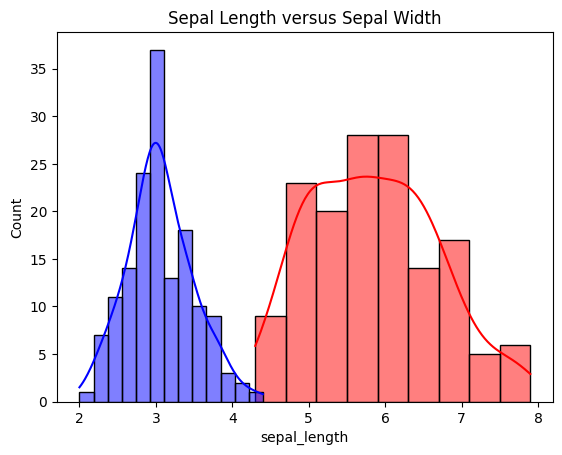

In [15]:
sns.histplot(
    iris.sepal_length, kde=True, color="r")
sns.histplot(
    iris.sepal_width, kde=True, color="b")
plt.title("Sepal Length versus Sepal Width")
plt.show()

## Two-Dimensional Graphics

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

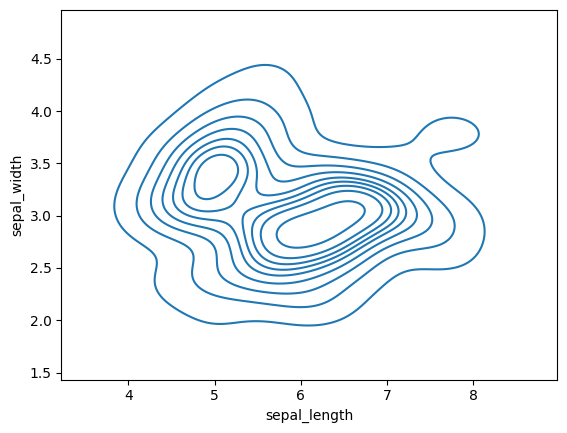

In [16]:
sns.kdeplot(
    data=iris, x="sepal_length", y="sepal_width")

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

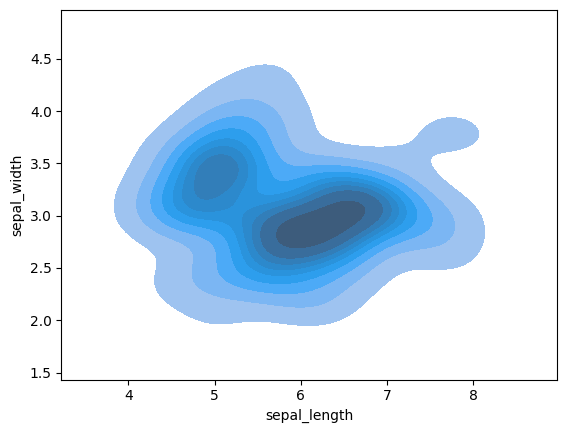

In [17]:
sns.kdeplot(
    data=iris, x="sepal_length", 
    y="sepal_width", shade=True)

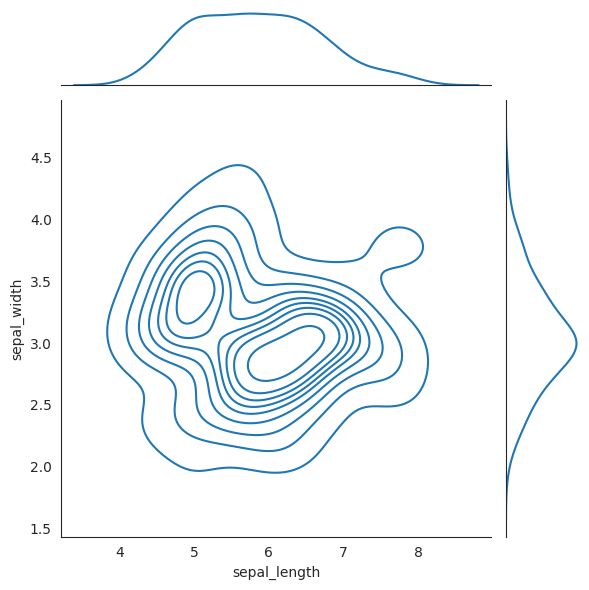

In [18]:
with sns.axes_style('white'):
    sns.jointplot(
        data= iris, x="sepal_length", 
        y="sepal_width", kind='kde')

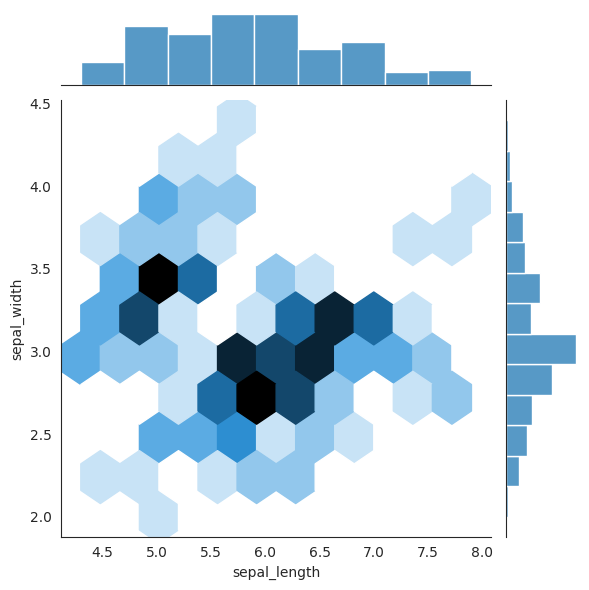

In [19]:
with sns.axes_style('white'):
    sns.jointplot(
        data= iris, x="sepal_length", 
        y="sepal_width", kind='hex')

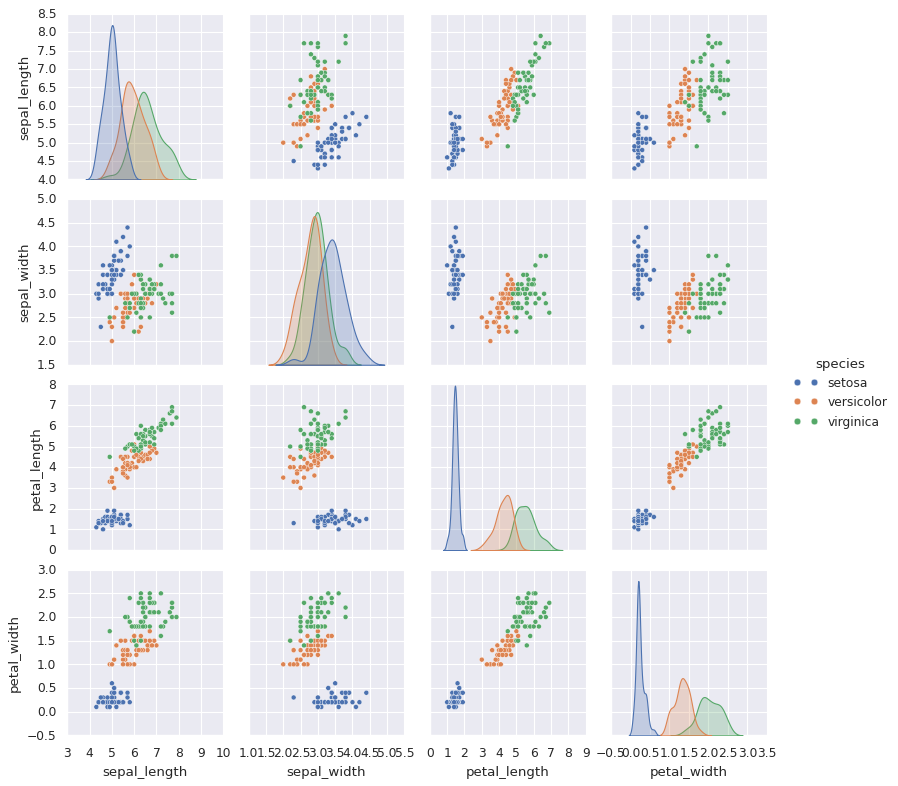

In [32]:
sns.pairplot(iris, hue='species')

## Special examples of data viz

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph

# Create a modular graph (dummy data)
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)



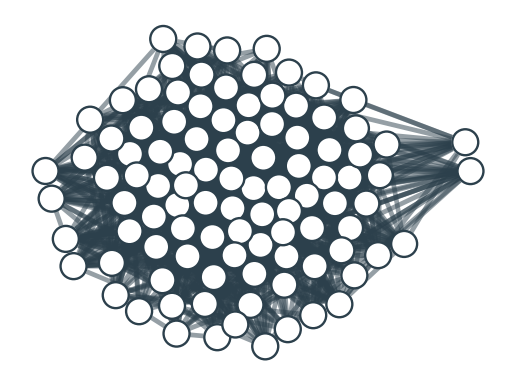

In [34]:
%%capture --no-display
# ^ Hide annoying warning for this cell

# Build graph
Graph(g)

In [35]:
# Create a dictionary mapping nodes to their community. 
# This information is used position nodes according to their community 
# when using the `community` node layout in netgraph.
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# Color nodes according to their community.
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

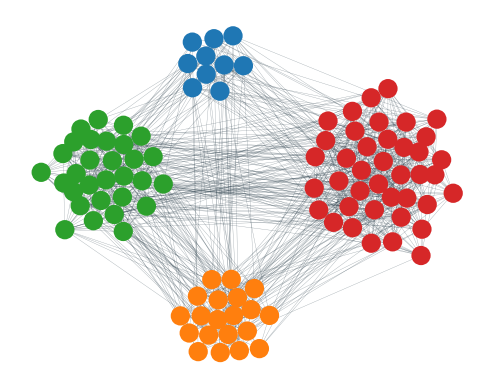

In [36]:
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, # indicates the community each belongs to  
      node_edge_width=0,     # no black border around nodes 
      edge_width=0.1,        # use thin edges, as they carry no information in this visualisation
      edge_alpha=0.5,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

In [38]:
tips=sns.load_dataset('tips')

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips["tip_percent"]=tips[
    "tip"]*100/tips["total_bill"]

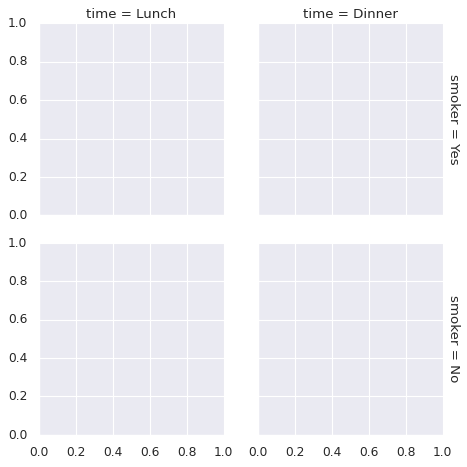

In [41]:
grid=sns.FacetGrid(
    tips, row="smoker",col="time", 
    margin_titles=True)

In [42]:
grid.map(
    plt.hist, "tip_percent", 
    bins=np.linspace(0,40,15))

## Box Plots

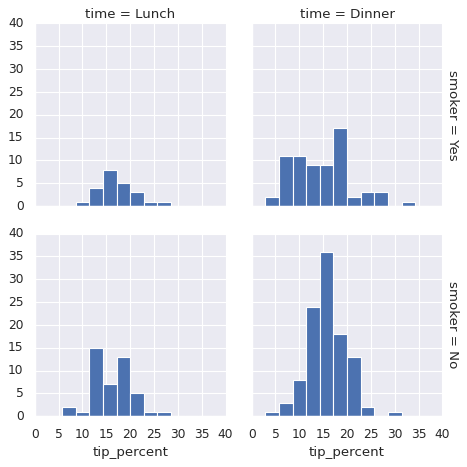

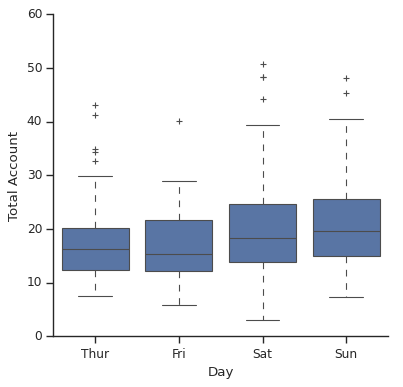

In [43]:
with sns.axes_style(style='ticks'): 
    g = sns.catplot(x="day", y="total_bill", 
                    data=tips, kind="box")
g.set_axis_labels("Day", "Total Account")

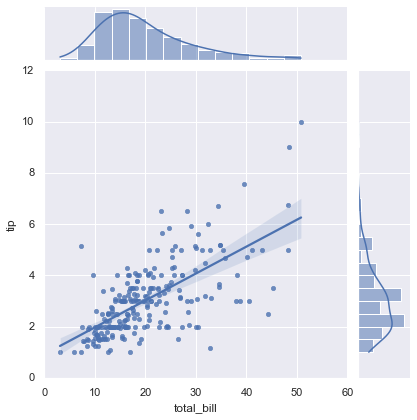

In [29]:
sns.jointplot(x="total_bill", 
              y="tip", 
              data=tips, 
              kind='reg')

## Bar Plots

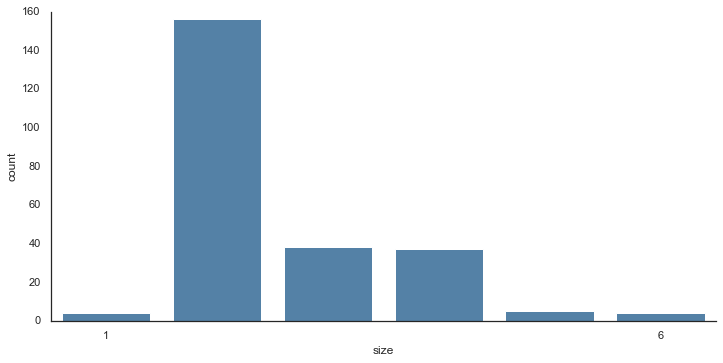

In [30]:
with sns.axes_style('white'):
	g = sns.catplot(x="size", data=tips, 
                    aspect=2,kind="count", color='steelblue') 	
	g.set_xticklabels(step=5)

Don't forget to follow us on [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎